In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
df=pd.read_csv("gdp.csv")
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


#### Are there any null values? If so, either chose to remove them completely or fill them in. Provide your reasoning.

In [5]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

#### 0 null values

#### Is the data uniform? Ex. Are there any weird periods or quotation marks in them? If so, modify the data.

In [6]:
df["Country Name"]

0        Arab World
1        Arab World
2        Arab World
3        Arab World
4        Arab World
            ...    
11502      Zimbabwe
11503      Zimbabwe
11504      Zimbabwe
11505      Zimbabwe
11506      Zimbabwe
Name: Country Name, Length: 11507, dtype: object

In [7]:
df["Country Code"]

0        ARB
1        ARB
2        ARB
3        ARB
4        ARB
        ... 
11502    ZWE
11503    ZWE
11504    ZWE
11505    ZWE
11506    ZWE
Name: Country Code, Length: 11507, dtype: object

#### No weird 

#### Do the data types match the value they represent? Ex. Are integers shown as objects? If so, modify the data accordingly.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


#### Yes the data types match the value they represent

#### How many unique countries do we have in the dataset?

In [9]:
df["Country Name"].value_counts()

Country Name
Hong Kong SAR, China      57
Jamaica                   57
Honduras                  57
Caribbean small states    57
Iceland                   57
                          ..
Channel Islands           10
Nauru                     10
South Sudan                8
Somalia                    4
Cayman Islands             2
Name: count, Length: 256, dtype: int64

#### 256 countries

#### How many years of data do we have for India?

In [10]:
df[df["Country Name"]=="India"].value_counts().sum()

57

#### 57 Years

#### What is the WORLD GDP in 1969?

In [11]:
total=df[df["Year"]==1969]
code=total[total["Country Code"]=="WLD"]
print(code)

     Country Name Country Code  Year         Value
2258        World          WLD  1969  2.690798e+12


#### 2.69e+12

#### Whats the % of GDP growth of India in Year 1994 (*as compare to 1993)?

In [12]:
IndiaGDP=df[df["Country Name"]=="India"]
GrowthRate=int(IndiaGDP[IndiaGDP["Year"]==1994]["Value"])/int(IndiaGDP[IndiaGDP["Year"]==1993]["Value"])
print(GrowthRate)

1.1717874821023035


/var/folders/hr/6kzbtbts2wzf39zxkpj1lg4w0000gn/T/ipykernel_29902/633570935.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  GrowthRate=int(IndiaGDP[IndiaGDP["Year"]==1994]["Value"])/int(IndiaGDP[IndiaGDP["Year"]==1993]["Value"])


#### Find the GDP growth of India from 1960-2016 and create a graph.

In [13]:
IndiaGDP=df[df["Country Name"]=="India"]
gdp1960=IndiaGDP["Value"][6074]
gdp2016=IndiaGDP["Value"][6130]
print(gdp2016/gdp1960)

61.96072762594172


<Axes: xlabel='Year', ylabel='Value'>

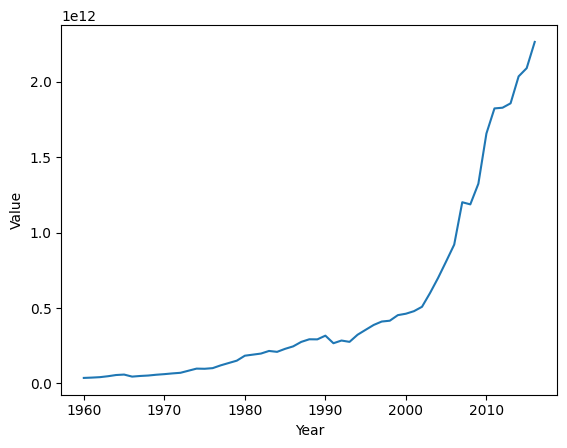

In [14]:
sns.lineplot(data=IndiaGDP,x="Year",y="Value")

#### Create a new column named GDP which shows the GDP growth of each country for that year compared to the previous year.

In [78]:
dfk=df.groupby("Country Name")
my_list=[]
for x in dfk:
    my_list.append(x)
print(my_list)
for i in range(len(my_list)):
    if my_list[i]==my_list[i+1]:
        growth=df[i+1]["Value"]/df[i]["Value"]
        my_list.append(growth)
    else:
        my_list.append(0)
    df["GDP growth"]=my_list

ValueError: Length of values (257) does not match length of index (11507)

In [87]:
df.head()

,Country Name,Country Code,Year,Value,GDP growth
0,Arab World,ARB,1968,2.576068e+10,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10,4.331606e+10


In [88]:
m_list=[]
for name in df["Country Name"].unique():
    dfd=df[df["Country Name"]== name]
    data=dfd.values
    gdpgrowth=[0]
    for i in range(1,len(data)-1):
        # if data[i][0]==data[i+1][0]:
        rate=data[i+1][3]/data[i][3]
        gdpgrowth.append(rate)
        dfd=dfd.assign(GDP=rate)
        m_list.append(dfd)
df=pd.concat(m_list,axis=0)
df.head()

,Country Name,Country Code,Year,Value,GDP growth,GDP
0,Arab World,ARB,1968,2.576068e+10,2.576068e+10,1.103794
1,Arab World,ARB,1969,2.843420e+10,2.843420e+10,1.103794
2,Arab World,ARB,1970,3.138550e+10,3.138550e+10,1.103794
3,Arab World,ARB,1971,3.642691e+10,3.642691e+10,1.103794
4,Arab World,ARB,1972,4.331606e+10,4.331606e+10,1.103794


In [18]:
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


#### Find the GDP by country name in descending order.

In [43]:
dfc=df[df["Year"]==2016]
dfn=dfc.sort_values("Value",ascending=False)
print(dfn)

                    Country Name Country Code  Year         Value
2305                       World          WLD  2016  7.584511e+13
718                  High income          HIC  2016  4.855746e+13
1656                OECD members          OED  2016  4.755262e+13
1802   Post-demographic dividend          PST  2016  4.521331e+13
832             IDA & IBRD total          IBT  2016  2.797282e+13
...                          ...          ...   ...           ...
8684                       Palau          PLW  2016  3.102483e+08
7666            Marshall Islands          MHL  2016  1.944979e+08
6765                    Kiribati          KIR  2016  1.815515e+08
8128                       Nauru          NRU  2016  1.020601e+08
10842                     Tuvalu          TUV  2016  3.421888e+07

[236 rows x 4 columns]
